In [1]:
from basecar import BaseCar
from basisklassen import FrontWheels, BackWheels
from basisklassen_cam import Camera
import time
import json
import numpy as np
import matplotlib.pylab as plt
import cv2
import matplotlib.pyplot as plt

In [31]:
class CameraCar(BaseCar):

    def __init__(self, front, back, camera, values_to_log):
        super().__init__(front, back, values_to_log)
        self.camera = camera
        self.picture_collect()
        print("CameraCar erzeugt")

    def picture_collect(self):
        img = self.camera.get_frame()
        self.camera.release()
        # img_small = cv2.resize(img, None, fx=0.25, fy=0.25)
        # plt.imshow(img_small)
        cv2.imwrite("/home/pi/Desktop/git/C2C_PP_02/pictures/Bild.jpg", img)

In [32]:
front = FrontWheels()
back = BackWheels()
cam = Camera(devicenumber = 0,
            buffersize = 10,
            skip_frame = 0,
            height = 480,
            width = 640,
            flip = True,
            # colorspace = 'rgb'
            )

In [33]:
cam_car = CameraCar(front,back,cam, [])

Daten in config.json:
 - Turning Offset:  0
 - Forward A:  0
 - Forward B:  0
BaseCar erzeugt
CameraCar erzeugt


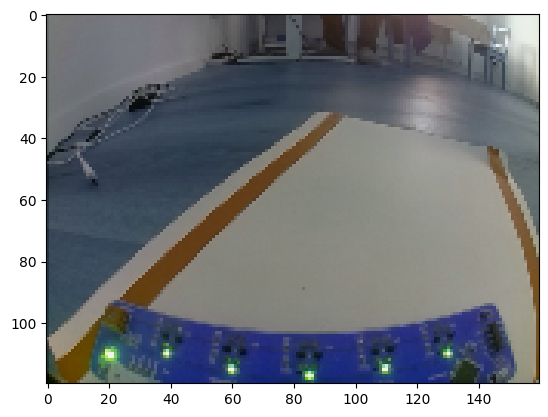

In [34]:
img = cv2.imread("/home/pi/Desktop/git/C2C_PP_02/pictures/Bild.jpg")
img_small = cv2.resize(img, None, fx=0.25, fy=0.25)
plt.imshow(img_small)

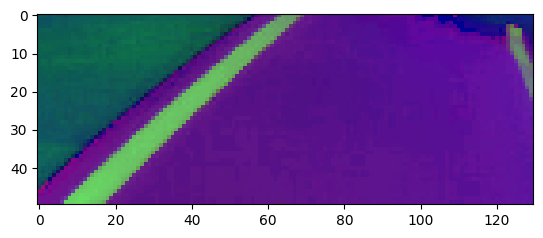

In [35]:
img_cropped = img_small.copy()[40:90, 20:150, :]
hsv = cv2.cvtColor(img_cropped,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

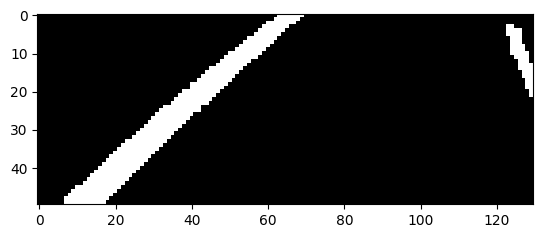

In [36]:
lower_blue = np.array([90, 60, 60])
upper_blue = np.array([130, 255, 255])

img_filtered = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(img_filtered, cmap="gray")

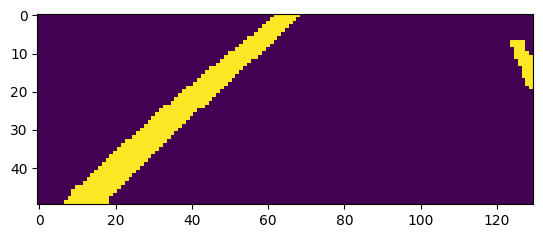

In [37]:
img_median_blur = cv2.medianBlur(img_filtered, 7)
plt.imshow(img_median_blur)

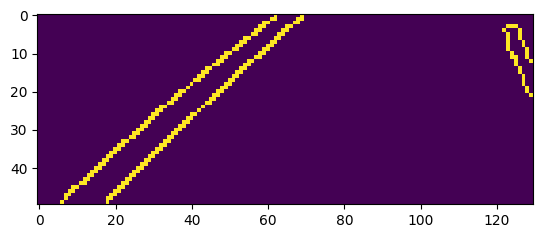

In [38]:
img_edges = cv2.Canny(img_filtered, 900, 1000)
plt.imshow(img_edges)

In [39]:
lines = cv2.HoughLinesP(img_edges,  1, np.pi / 180, threshold=30, minLineLength=25, maxLineGap=10)
print(lines)

[[[ 7 47 62  0]]

 [[18 49 55 12]]]


In [40]:
line_img = img_cropped.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

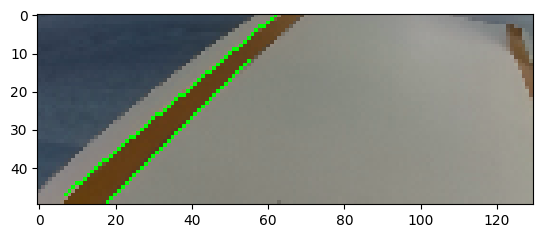

In [41]:
plt.imshow(line_img)

[GitLab OpenCV Link](https://gitlab.com/u4i/camp2code/-/blob/coachmarkets/13_OpenCV/04_%C3%9Cbungen_CM13/Exercise_CM13_deutsch_L%C3%B6sungen.ipynb?ref_type=heads)

In [48]:
rxEnd, ryEnd, rxStart, ryStart = lines[0][0]
print(rxEnd, ryEnd, rxStart, ryStart)

7 47 62 0


In [43]:
l = np.sqrt((rxEnd-rxStart)**2 + (ryEnd - ryStart)**2)
print(l)

72.34638899074369


In [49]:
if lines is not None:
    rechts = []
    links = []
    for line in lines:
        xEnd, yEnd, xStart, yStart = line[0]
        länge = np.sqrt((rxEnd-rxStart)**2 + (ryEnd - ryStart)**2)
        if xEnd < 60:
            print("Links")
            links.append(line[0])
ldurch = (links[0] + links[1])/2
print(ldurch)

Links
Links
[12.5 48.  58.5  6. ]


In [51]:
print(links)

[array([ 7, 47, 62,  0], dtype=int32), array([18, 49, 55, 12], dtype=int32)]


In [58]:
if lines is not None:
    rechts = []
    links = []
    for line in lines:
        xEnd, yEnd, xStart, yStart = line[0]
        länge = np.sqrt((rxEnd-rxStart)**2 + (ryEnd - ryStart)**2)
        if xEnd < 60:
            print("Links")
            links.append(line[0])
        elif xEnd > 60:
            print("Rechts")
            rechts.append(line[0])
if rechts != []:
    rdurch = (rechts[0] + rechts[1])/2
    print(rdurch)
    alpha2 = np.arctan((rdurch[3]-rdurch[1])/(rdurch[2]-rdurch[0]))
    alpha2 = np.degrees(alpha2)
    print(alpha2)
else:
    print("no right lane")
    alpha2 = 60 # muss noch überprüft werden

if links != []:
    ldurch = (links[0] + links[1])/2
    print(ldurch)
    alpha = np.arctan((ldurch[3]-ldurch[1])/(ldurch[2]-ldurch[0]))
    alpha = abs(np.degrees(alpha))
    print(alpha)
else:
    print("no left lane")
    alpha = 60 # muss noch überprüft werden


Links
Links
no right lane
[12.5 48.  58.5  6. ]
42.397437797500196


In [57]:
alpha2 = np.arctan((rdurch[3]-rdurch[1])/(rdurch[2]-rdurch[0]))
alpha2 = np.degrees(alpha2)
alpha2

58.535856369134244

In [56]:
alpha = np.arctan((ldurch[3]-ldurch[1])/(ldurch[2]-ldurch[0]))
alpha = abs(np.degrees(alpha))
alpha

42.397437797500196